In [1]:
#Set dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

sensors = ['42019','42043','42044','42047','8764314','8770613', 'TABS-X']
monthsf = ['0617','0717','0817','0917']

wx_type = ['air_pressure(mBar)', 
           'air_temperature', 
           'sea_water_practical_salinity', 
           'sea_water_temperature',
           'wind_speed']

filepath_csv = "../data/"
filepath = "../images/"
hurricane = "Harvey_v2"
year = 2017

In [2]:
# Read final csv file into a dataframes for postanalysis
df = pd.read_csv(f'{filepath_csv}{hurricane}_{year}.csv')
                   
print(f'Reading csvfile {hurricane}_{year}...{len(df)} records')
print()
df.shape

Reading csvfile Harvey_v2_2017...27028 records



(27028, 10)

In [3]:
# Display the dateframe
df.head()

,Unnamed: 0,date,sensor,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
0,0,2017-06-01 00:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1013.9,24.4,NaN,27.0,6.0
1,1,2017-06-01 01:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1013.4,25.1,NaN,27.0,2.0
2,2,2017-06-01 02:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1014.5,25.5,NaN,27.0,2.0
3,3,2017-06-01 03:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1015.6,25.6,NaN,27.0,3.0
4,4,2017-06-01 04:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1015.3,25.6,NaN,27.0,4.0


In [4]:
# defined function to get stats of analyzing dataframe after outliers 
# identified and marked as 'blank' in the previous script
def getstats(df, wx_type, comment):
    
    print(comment)
    print('-'*40)
    print(f'Total Records {len(df)}')
    print('-'*40)

    for i in wx_type:
        print(f'type: {i}')
        print(f'count: {df[i].count()} / {round((df[i].count()/len(df))*100,2)}%')
        print(f'min: {round(df[i].min(),2)}')
        print(f'max: {round(df[i].max(),2)}')
        print(f'avg: {round(df[i].mean(),3)}')
        print(f'med: {round(df[i].median(),3)}')
        print('-')

In [5]:
getstats(df, wx_type, 'After Data Change')

After Data Change
----------------------------------------
Total Records 27028
----------------------------------------
type: air_pressure(mBar)
count: 27000 / 99.9%
min: 947.23
max: 1177.0
avg: 1013.808
med: 1014.1
-
type: air_temperature
count: 26342 / 97.46%
min: -19.9
max: 46.7
avg: 27.321
med: 27.8
-
type: sea_water_practical_salinity
count: 20592 / 76.19%
min: 0.02
max: 36.91
avg: 26.446
med: 33.58
-
type: sea_water_temperature
count: 25265 / 93.48%
min: 12.2
max: 47.4
avg: 28.712
med: 28.91
-
type: wind_speed
count: 27028 / 100.0%
min: 0.0
max: 20.35
avg: 4.801
med: 4.856
-


In [6]:
print(len(df))
df_sensor = df.groupby(['sensor']).count()
df_sensor

27028


,Unnamed: 0,date,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
sensor,,,,,,,,,
ioos:station:NOAA.NOS.CO-OPS:8764314:1,2400,2400,2400,2400,2400,2400,2400,2400,2400
ioos:station:NOAA.NOS.CO-OPS:8770613:1,2366,2366,2366,2366,2366,2366,2366,2366,2366
ioos:station:TABS:X:1,5806,5806,5806,5806,5806,5806,5806,5806,5806
ioos:station:wmo:42019:1,2401,2401,2401,2401,2401,2401,0,2401,2401
ioos:station:wmo:42043:1,3370,3370,3370,3370,3342,3370,2439,3335,3370
ioos:station:wmo:42044:1,5853,5853,5853,5853,5853,5167,5853,5853,5853
ioos:station:wmo:42047:1,4832,4832,4832,4832,4832,4832,1728,3104,4832


In [7]:
sens0 = []
sens1 = []
sens2 = []
sens3 = []
sens4 = []
sens5 = []
sens6 = []

# Define sensor type list
sensor_type = [
    'ioos:station:wmo:42019:1',
    'ioos:station:wmo:42043:1',
    'ioos:station:wmo:42044:1',
    'ioos:station:wmo:42047:1',
    'ioos:station:NOAA.NOS.CO-OPS:8764314:1',
    'ioos:station:NOAA.NOS.CO-OPS:8770613:1',
    'ioos:station:TABS:X:1'
]

# for loop to assign each row to its corresponding sensor and adding it its list
for i in range(len(df)):
        if df['sensor'][i] == sensor_type[0]:
            sens0.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[1]:
            sens1.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[2]:
            sens2.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[3]:
            sens3.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[4]:
            sens4.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[5]:
            sens5.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[6]:
            sens6.append(df.iloc[i,:])


In [8]:
# Creat a new dataframe for each sensor list
df_sens0 = pd.DataFrame(sens0)
df_sens1 = pd.DataFrame(sens1)
df_sens2 = pd.DataFrame(sens2)
df_sens3 = pd.DataFrame(sens3)
df_sens4 = pd.DataFrame(sens4)
df_sens5 = pd.DataFrame(sens5)
df_sens6 = pd.DataFrame(sens6)

In [9]:
# Create formatted sensor_type list for box plot labels
srt = [
    '42019',
    '42043',
    '42044',
    '42047',
    '8764314',
    '8770613',
    'TABS'
]

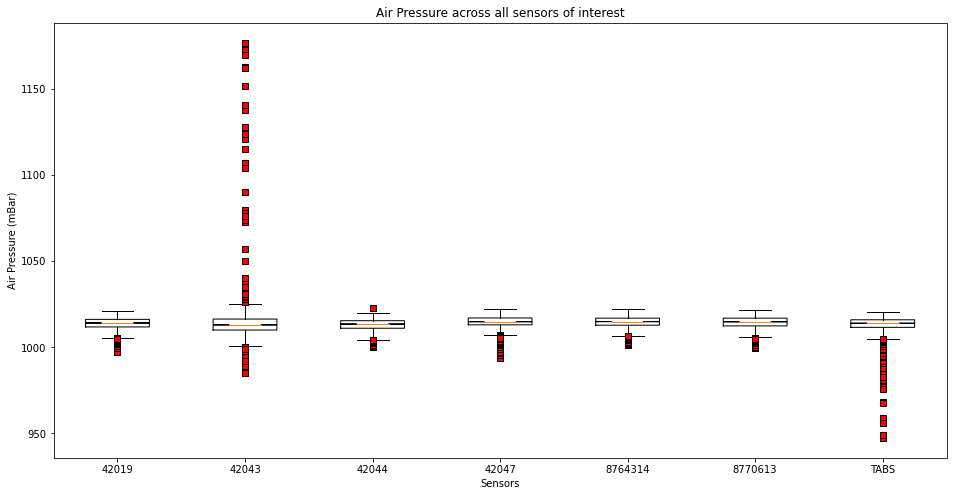

In [10]:
# Generate a box plot of the air pressure for each sensor - ALL
# Omit blank na values
airp0 = df_sens0["air_pressure(mBar)"].dropna()
airp1 = df_sens1["air_pressure(mBar)"].dropna()
airp2 = df_sens2["air_pressure(mBar)"].dropna()
airp3 = df_sens3["air_pressure(mBar)"].dropna()
airp4 = df_sens4["air_pressure(mBar)"].dropna()
airp5 = df_sens5["air_pressure(mBar)"].dropna()
airp6 = df_sens6["air_pressure(mBar)"].dropna()

# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Air Pressure across all sensors of interest')
plt.ylabel('Air Pressure (mBar)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot([airp0,airp1,airp2,airp3,airp4,airp5,airp6],
           labels=srt,
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_airpressure.png"))

# Show the chart
plt.show()

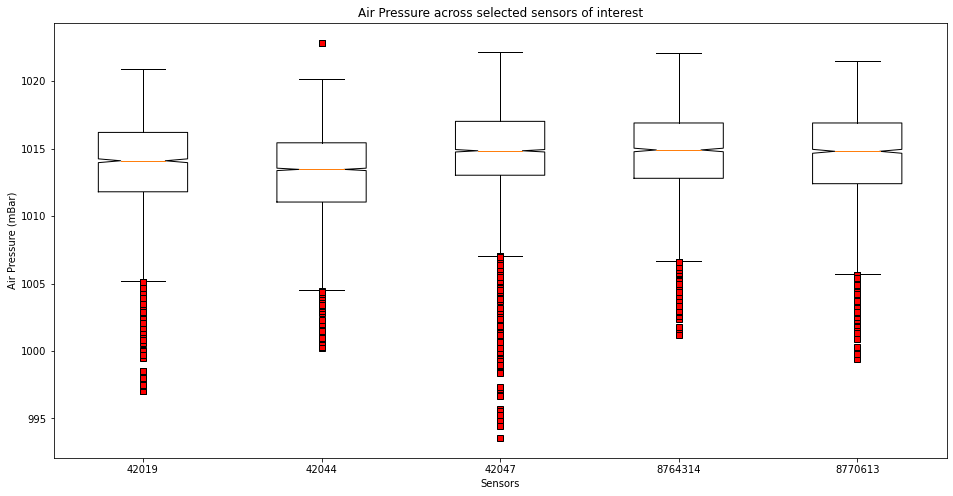

In [11]:
# Generate a box plot of the air pressure for each sensor - OMIT OUTLIERS
# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Air Pressure across selected sensors of interest')
plt.ylabel('Air Pressure (mBar)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot([airp0,airp2,airp3,airp4,airp5],
           labels=[srt[0],srt[2],srt[3],srt[4],srt[5]],
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_airpressure_b.png"))

# Show the chart
plt.show()

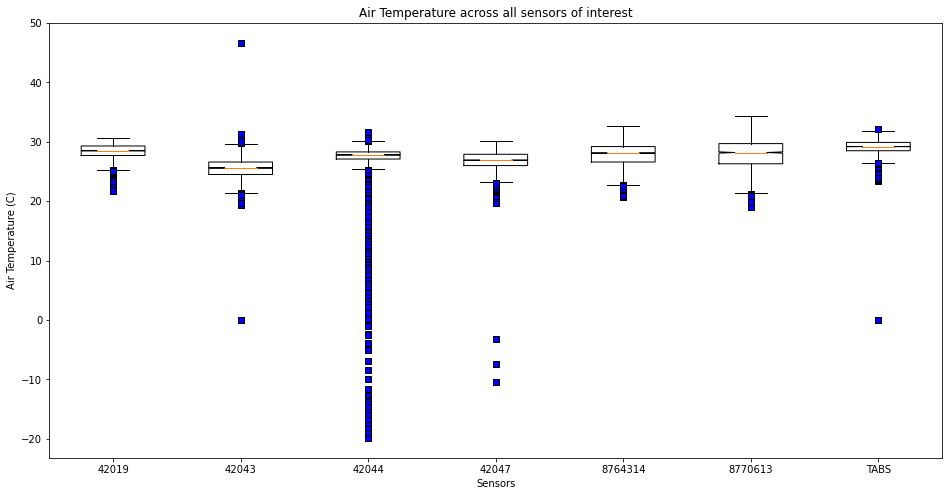

In [12]:
# Generate a box plot of the air temperature for each sensor - ALL
airt0 = df_sens0["air_temperature"].dropna()
airt1 = df_sens1["air_temperature"].dropna()
airt2 = df_sens2["air_temperature"].dropna()
airt3 = df_sens3["air_temperature"].dropna()
airt4 = df_sens4["air_temperature"].dropna()
airt5 = df_sens5["air_temperature"].dropna()
airt6 = df_sens6["air_temperature"].dropna()

# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Air Temperature across all sensors of interest')
plt.ylabel('Air Temperature (C)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='b', marker='s')
plt.boxplot([airt0,airt1,airt2,airt3,airt4,airt5,airt6],
           labels=srt,
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_airtemperature.png"))

# Show the chart
plt.show()

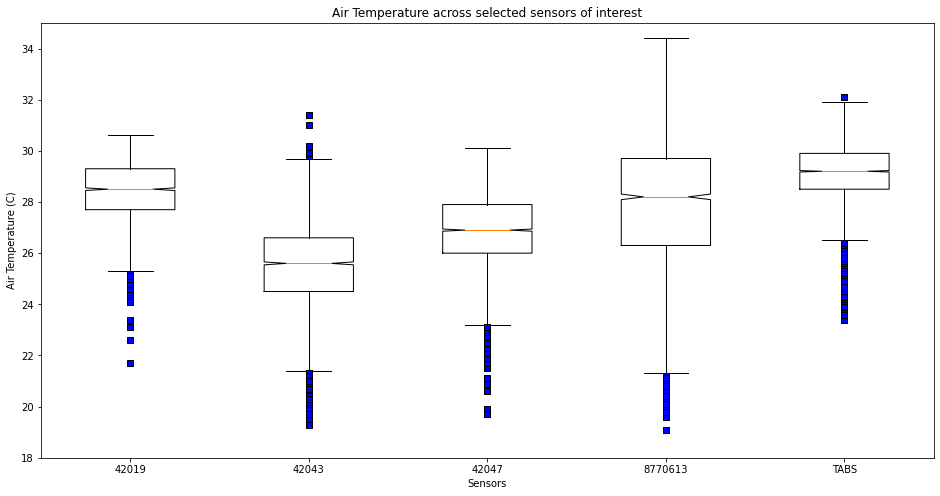

In [13]:
# Generate a box plot of the air temperature for each sensor - OMIT OUTLIERS
# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Air Temperature across selected sensors of interest')
plt.ylabel('Air Temperature (C)')
plt.xlabel('Sensors')
plt.ylim(18,35)

# Create boxplot
red_square = dict(markerfacecolor='b', marker='s')
plt.boxplot([airt0,airt1,airt3,airt5,airt6],
           labels=[srt[0],srt[1],srt[3],srt[5],srt[6]],
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_airtemperature_b.png"))

# Show the chart
plt.show()

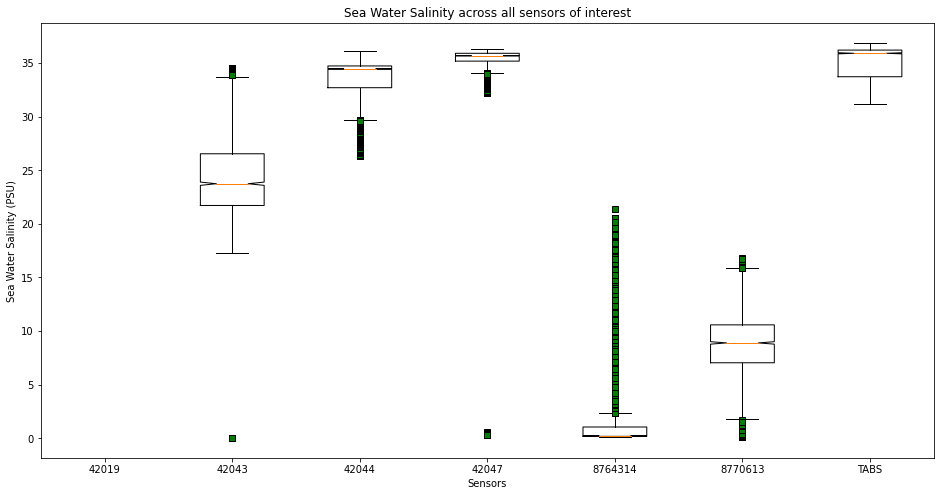

In [14]:
# Generate a box plot of the sea water salinity for each sensor - ALL
seasal0 = df_sens0["sea_water_practical_salinity"].dropna()
seasal1 = df_sens1["sea_water_practical_salinity"].dropna()
seasal2 = df_sens2["sea_water_practical_salinity"].dropna()
seasal3 = df_sens3["sea_water_practical_salinity"].dropna()
seasal4 = df_sens4["sea_water_practical_salinity"].dropna()
seasal5 = df_sens5["sea_water_practical_salinity"].dropna()
seasal6 = df_sens6["sea_water_practical_salinity"].dropna()

# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Sea Water Salinity across all sensors of interest')
plt.ylabel('Sea Water Salinity (PSU)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot([seasal0,seasal1,seasal2,seasal3,seasal4,seasal5,seasal6],
           labels=srt,
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_seasalinty.png"))

# Show the chart
plt.show()

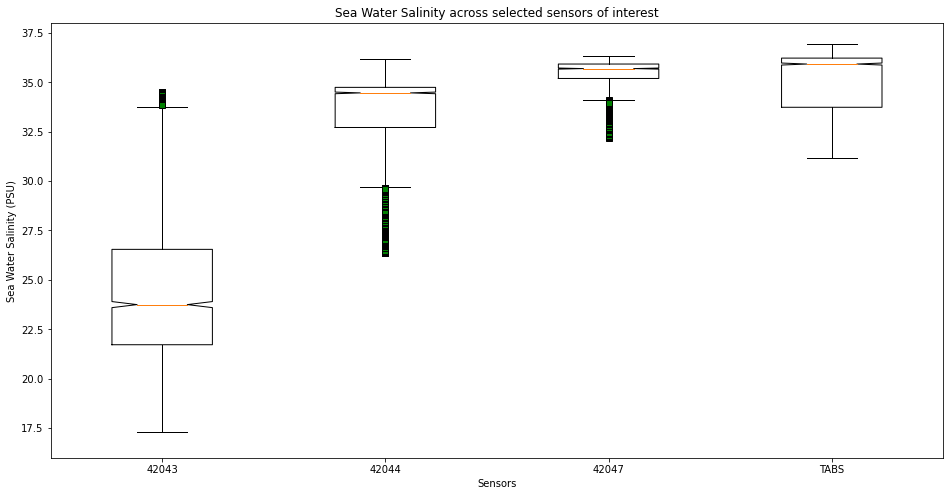

In [15]:
# Generate a box plot of the sea water salinity for each sensor - OMIT OUTLIERS
# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Sea Water Salinity across selected sensors of interest')
plt.ylabel('Sea Water Salinity (PSU)')
plt.xlabel('Sensors')
plt.ylim(16,38)

# Create boxplot
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot([seasal1, seasal2,seasal3,seasal6],
           labels=[srt[1],srt[2],srt[3],srt[6]],
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_seasalinty_b.png"))

# Show the chart
plt.show()

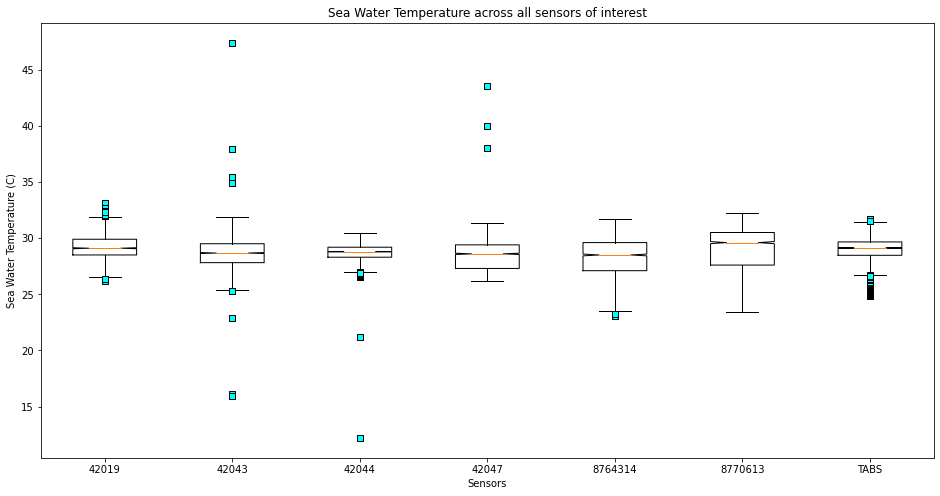

In [16]:
# Generate a box plot of the sea water temperature for each sensor - ALL
seatemp0 = df_sens0["sea_water_temperature"].dropna()
seatemp1 = df_sens1["sea_water_temperature"].dropna()
seatemp2 = df_sens2["sea_water_temperature"].dropna()
seatemp3 = df_sens3["sea_water_temperature"].dropna()
seatemp4 = df_sens4["sea_water_temperature"].dropna()
seatemp5 = df_sens5["sea_water_temperature"].dropna()
seatemp6 = df_sens6["sea_water_temperature"].dropna()

# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Sea Water Temperature across all sensors of interest')
plt.ylabel('Sea Water Temperature (C)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='cyan', marker='s')
plt.boxplot([seatemp0,seatemp1,seatemp2,seatemp3,seatemp4,seatemp5,seatemp6],
           labels=srt,
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_seatemperature.png"))

# Show the chart
plt.show()

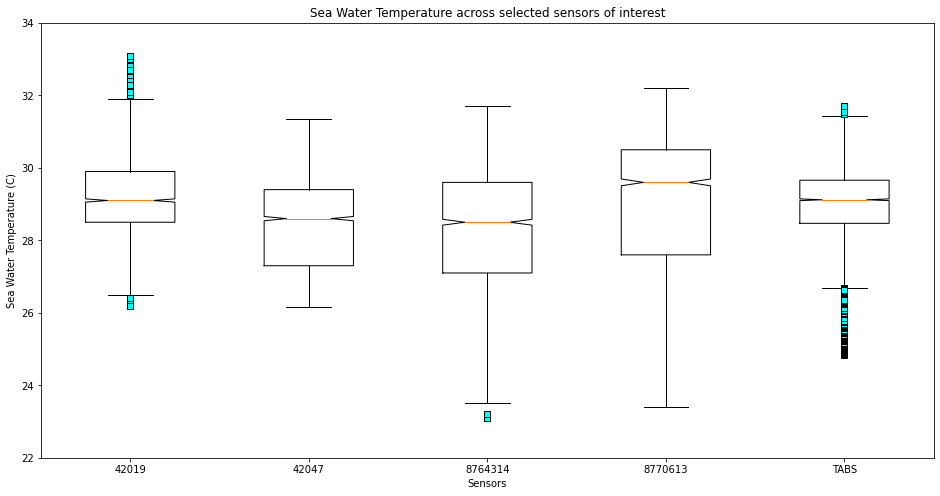

In [17]:
# Generate a box plot of the sea water temperature for each sensor - OMIT OUTLIERS
# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Sea Water Temperature across selected sensors of interest')
plt.ylabel('Sea Water Temperature (C)')
plt.xlabel('Sensors')
plt.ylim(22,34)

# Create boxplot
red_square = dict(markerfacecolor='cyan', marker='s')
plt.boxplot([seatemp0,seatemp3,seatemp4,seatemp5,seatemp6],
           labels=[srt[0],srt[3],srt[4],srt[5],srt[6]],
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_seatemperature_b.png"))

# Show the chart
plt.show()

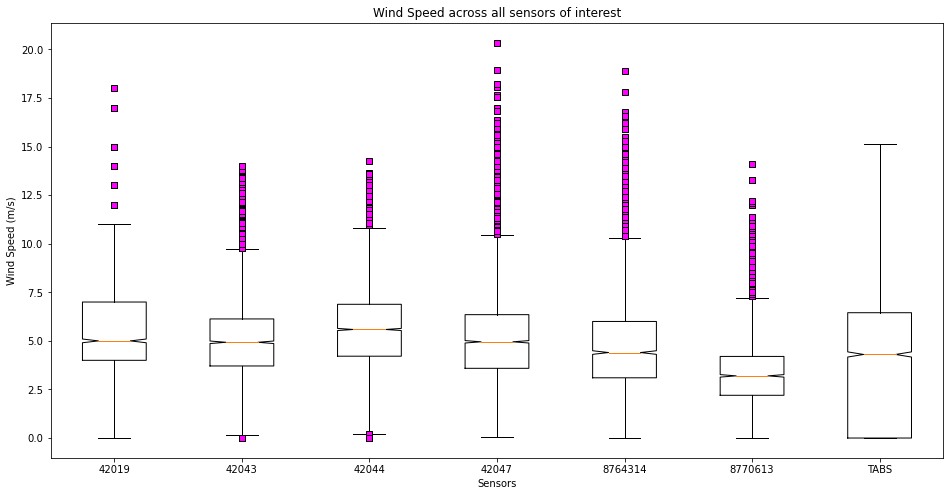

In [18]:
# Generate a box plot of the wind speed for each sensor - ALL
wind0 = df_sens0["wind_speed"].dropna()
wind1 = df_sens1["wind_speed"].dropna()
wind2 = df_sens2["wind_speed"].dropna()
wind3 = df_sens3["wind_speed"].dropna()
wind4 = df_sens4["wind_speed"].dropna()
wind5 = df_sens5["wind_speed"].dropna()
wind6 = df_sens6["wind_speed"].dropna()

# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Wind Speed across all sensors of interest')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Sensors')

# Create boxplot
red_square = dict(markerfacecolor='magenta', marker='s')
plt.boxplot([wind0,wind1,wind2,wind3,wind4,wind5,wind6],
           labels=srt,
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_windspeed.png"))

# Show the chart
plt.show()

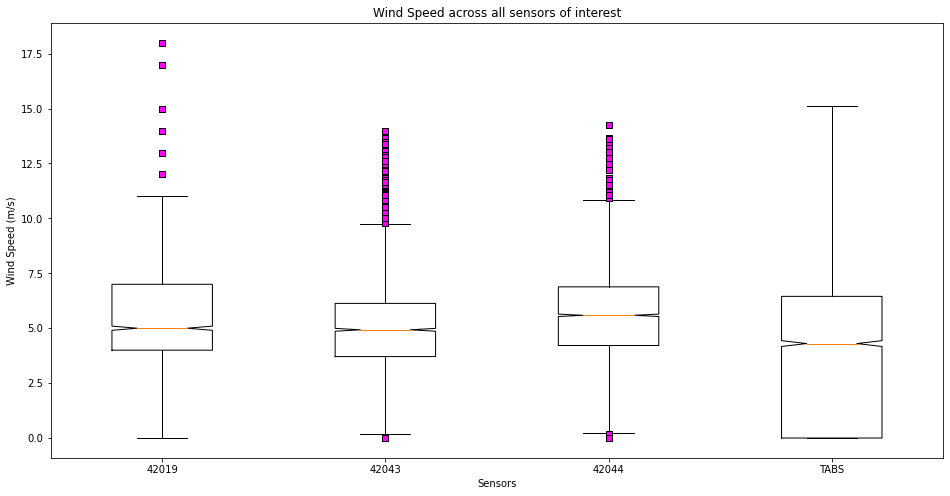

In [19]:
#Generate a box plot of the wind speed for each sensor - OMIT OUTLIERS
# Set the size of the plot (width, height) 
plt.figure(figsize=(16,8))

# Set title/labels
plt.title('Wind Speed across all sensors of interest')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Sensors')
#plt.ylim()

# Create boxplot
red_square = dict(markerfacecolor='magenta', marker='s')
plt.boxplot([wind0,wind1,wind2,wind6],
           labels=[srt[0],srt[1],srt[2],srt[6]],
           flierprops=red_square,
           notch=True)

# Save the chart
plt.savefig(os.path.join(filepath,"boxplot_windspeed_b.png"))

# Show the chart
plt.show()